### Importing modules

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
import os 
import tensorflow as tf

### Getting the train and test data

In [2]:
train_data_path = os.path.join('split_data_for_lstm', 'train.csv')
test_data_path = os.path.join('split_data_for_lstm', 'test.csv')

train = pd.read_csv(train_data_path)
test = pd.read_csv(test_data_path)

train['Date'] = pd.to_datetime(train['Date'])
train.set_index('Date', inplace=True)

test['Date'] = pd.to_datetime(test['Date'])
test.set_index('Date', inplace=True)

### Loading Models

In [3]:
preprocessor_path = os.path.join('models', 'preprocessor_for_lstm.joblib')
model_path = os.path.join('models', 'LSTM_model.keras')

In [4]:
scaler = joblib.load(preprocessor_path)
model = tf.keras.models.load_model(model_path)

### Scaling the data and Preparing the data for the Model

In [5]:
train_scaled = scaler.transform(train[['Close']])
test_scaled = scaler.transform(test[['Close']])

def create_dataset(data, time_step=1):
    X, y = [], []
    for i in range(len(data) - time_step - 1):
        X.append(data[i:(i + time_step), 0])
        y.append(data[i + time_step, 0])
    return np.array(X), np.array(y)


# Set time step (number of previous days to consider)
time_step = 60

X_train, y_train = create_dataset(train_scaled, time_step)
X_test, y_test = create_dataset(test_scaled, time_step)

# Reshape input to be [samples, time steps, features]
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

### Performance for the Training Dataset

#### Predicting the Training values

In [6]:
# Prepare the training data for predictions
train_predictions = model.predict(X_train)

# Inverse transform to get actual values
train_predictions = scaler.inverse_transform(train_predictions)

# Create a DataFrame for the training predictions
train_pred_df = pd.DataFrame(train_predictions, index=train.index[time_step+1:], columns=['Predicted'])
actual_train_df = train[['Close']].iloc[time_step+1:]

# Combine actual and predicted values for plotting
combined_train_df = pd.concat([actual_train_df, train_pred_df], axis=1)
combined_train_df.columns = ['Actual', 'Predicted']

80/80 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step


#### Checking the line graph for the Training Dataset

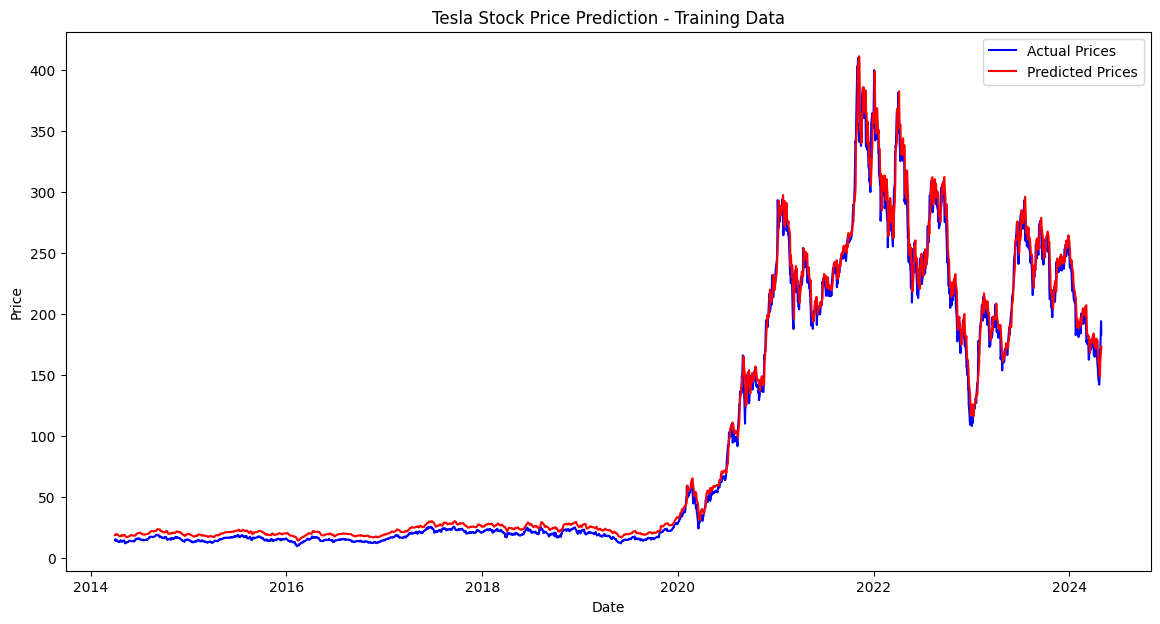

In [7]:
plt.figure(figsize=(14, 7))
sns.lineplot(data=combined_train_df['Actual'], label='Actual Prices', color='blue')
sns.lineplot(data=combined_train_df['Predicted'], label='Predicted Prices', color='red')
plt.title('Tesla Stock Price Prediction - Training Data')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

### Performance for the Testing Dataset

#### Predicting the Testing values

In [8]:
predictions = model.predict(X_test)

# Inverse transform to get actual values
predictions = scaler.inverse_transform(predictions)

predicted_df = pd.DataFrame(predictions, index=test.index[time_step+1:], columns=['Predicted'])
actual_df = test[['Close']].iloc[time_step+1:]

# Combine actual and predicted values for plotting
combined_df = pd.concat([actual_df, predicted_df], axis=1)
combined_df.columns = ['Actual', 'Predicted']

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


#### Checking the line graph for the Testing Dataset

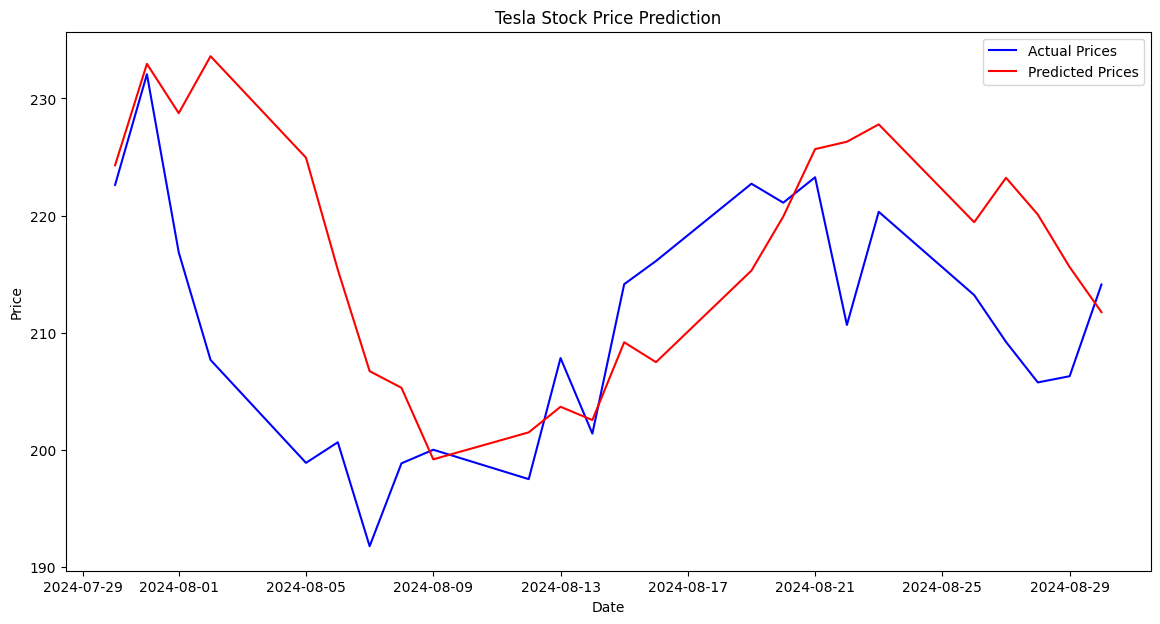

In [9]:
plt.figure(figsize=(14,7))
sns.lineplot(data=combined_df['Actual'], label='Actual Prices', color='blue')
sns.lineplot(data=combined_df['Predicted'], label='Predicted Prices', color='red')
plt.title('Tesla Stock Price Prediction')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()